In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats

# CHAPTER 4: Applied

### 13.

#### (a) 

In [2]:
weekly = load_data('Weekly')
weekly.head(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


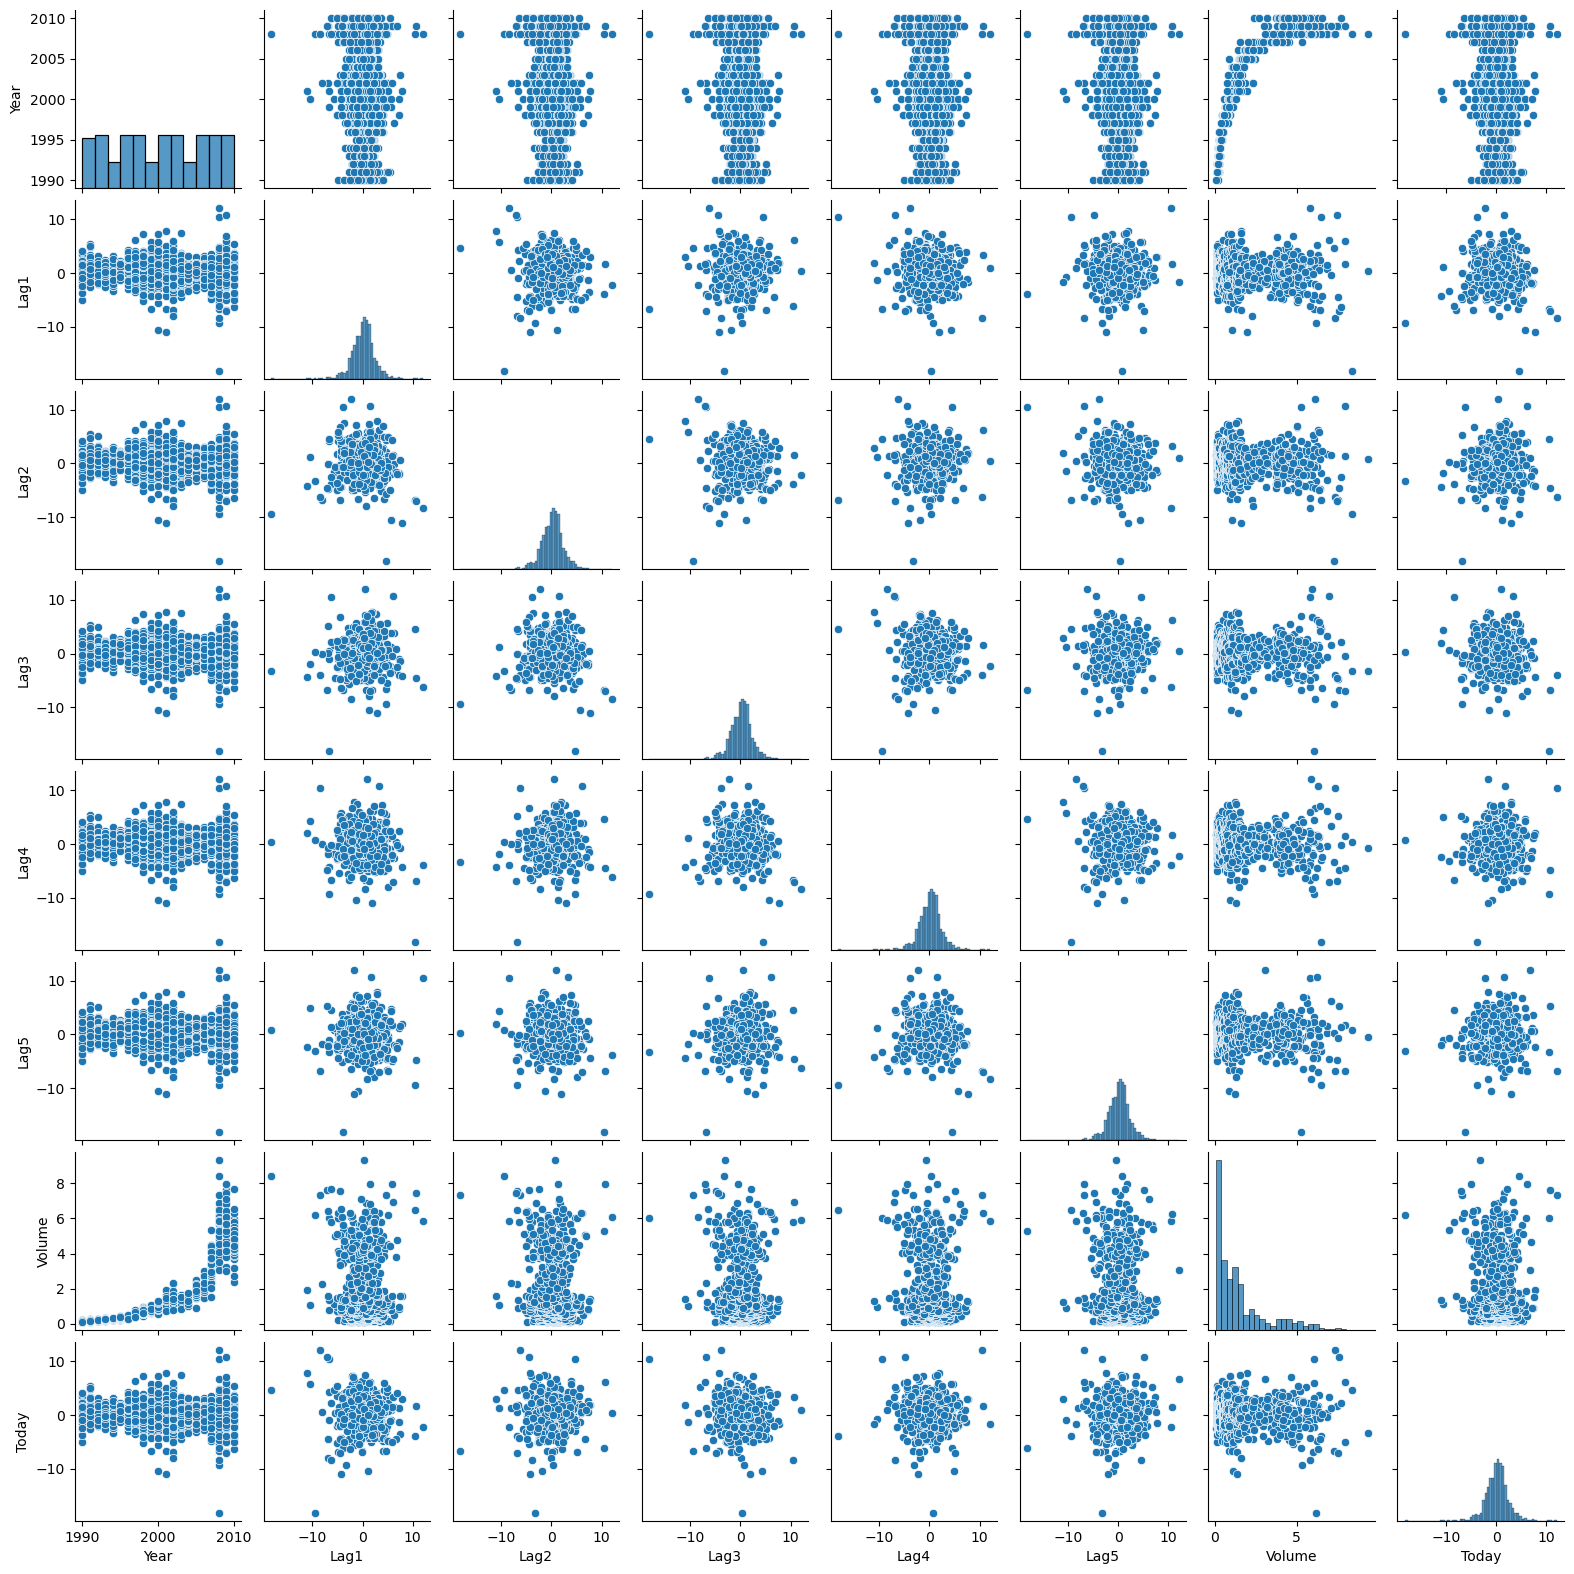

In [4]:
sns.pairplot(weekly[['Year', 'Lag1', 'Lag2', 'Lag3','Lag4', 'Lag5', 'Volume', 'Today']], height=2)
plt.show;

In [5]:
df_corr = weekly[['Year', 'Lag1', 'Lag2', 'Lag3','Lag4', 'Lag5', 'Volume', 'Today']].dropna().corr()
df_corr

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


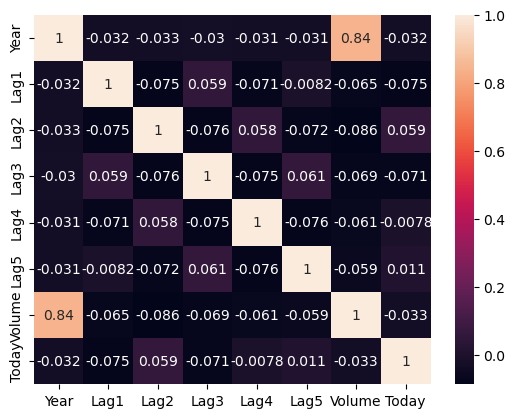

In [6]:
sns.heatmap(df_corr, annot=True);

#### (b)

In [7]:
X = weekly.drop(columns=['Today', 'Direction', 'Year'])
X=sm.add_constant(X)
y = weekly.Direction == 'Up'
glm = sm.GLM(y,X,family=sm.families.Binomial())
results = glm.fit()
results.summary()
#results.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Tue, 30 Apr 2024   Deviance:                       1486.4
Time:                        20:14:39   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

**[ANSWER] Only `Lag2` predictor is statistically significant with a p-value of 0.029601**

#### (c)

In [8]:
probs = results.predict()
labels = np.array(['Down']*1089)
labels[probs>0.5] = "Up"

In [9]:
confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [10]:
(557+54)/1089, np.mean(labels == weekly.Direction)

(0.5610651974288338, 0.5610651974288338)

**[ANSWER]**
**True negative (TN) - 54**\
**True positive (TP) - 557**\
**False negative (FN) - 48**\
**False positive (FP) - 430**\
**Logistic regression correctly predicted the movement of the market 56.1% of the time.**

#### (d)

In [11]:
train = (weekly.Year < 2009)
weekly_train = weekly.loc[train]
weekly_test = weekly.loc[~train] # The ~ flips 1s to 0s and 0s to 1s
weekly_test.shape

(104, 9)

In [12]:
X_train=weekly_train.drop(columns=['Year','Lag1','Lag3','Lag4','Lag5','Volume','Today', 'Direction'])
X_train=sm.add_constant(X_train)
X_test=weekly_test.drop(columns=['Year','Lag1','Lag3','Lag4','Lag5','Volume','Today', 'Direction'])
X_test=sm.add_constant(X_test)
y_train, y_test = y.loc[train], y.loc[~train]

glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Tue, 30 Apr 2024   Deviance:                       1350.5
Time:                        20:14:39   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2033      0.064      3.162      0.002       0.077       0.329
Lag2           0.0581      0.029      2.024      0.043       0.002       0.114
==============================================================================
"""

In [14]:
D = weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [15]:
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [16]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.625, 0.375)

**[ANSWER] The test accuracy is 62.5%**

#### (e)

In [17]:
X_train, X_test = [M.drop(columns=['const'])
                   for M in [X_train, X_test]]

In [18]:
lda = LDA(store_covariance=True)
lda.fit(X_train, L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [19]:
lda_pred = lda.predict(X_test)

In [20]:
confusion_table(lda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


**[ANSWER] LDA and logistic regression predictions are identical**

#### (f)

In [21]:
qda = QDA(store_covariance=True)
qda.fit(X_train, L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [22]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [23]:
np.mean(qda_pred == L_test)

0.5865384615384616

**QDA correctly predicted the movement of the market 58.6% of the time.**

#### (g)

In [24]:
knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, L_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, L_test)

Truth,Down,Up
Predicted,,
Down,22,31
Up,21,30


**[ANSWER] KNN with K = 1 correctly predicted the movement of the market 50.6% of the time.**

In [25]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3_pred = knn3.fit(X_train, L_train).predict(X_test)
confusion_table(knn3_pred, L_test)

Truth,Down,Up
Predicted,,
Down,16,20
Up,27,41


**[ANSWER] KNN with K = 3 correctly predicted the movement of the market 54.8% of the time.**

#### (h)

In [26]:
NB = GaussianNB()
NB.fit(X_train, L_train)

GaussianNB()

In [27]:
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, L_test)

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


**[ANSWER] QDA and naive Bayes predictions are identical**

#### (i)

**[ANSWER] LDA and logistic regression predictions rate is highest with 62.5%**

#### (j) 

In [28]:
for K in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, L_train).predict(X_test)
    C = confusion_table(knn_pred, L_test)
    #print(C)
    
    correct = C.loc['Up','Up']+C.loc['Down','Down']
    not_correct = C.loc['Down','Up']+C.loc['Up', 'Down']
    
    print(f"K={K} preduction rate is {round((correct/(correct+not_correct))*100,1)}%")

K=1 preduction rate is 50.0%
K=2 preduction rate is 47.1%
K=3 preduction rate is 54.8%
K=4 preduction rate is 57.7%
K=5 preduction rate is 53.8%
K=6 preduction rate is 51.0%
K=7 preduction rate is 54.8%
K=8 preduction rate is 55.8%
K=9 preduction rate is 54.8%
K=10 preduction rate is 56.7%


**[ANSWER] KNN with K = 4 gives prediction rate 57.7%.**

___

### 14.

#### (a)

In [29]:
auto = pd.read_csv('auto.csv')

In [30]:
mpg01=[]
for i, row in auto.iterrows():
    if auto.loc[i,'mpg']>auto['mpg'].median():
        mpg01.append(1)
    else:
        mpg01.append(0)

In [31]:
auto['mpg01'] = mpg01

#### (b)

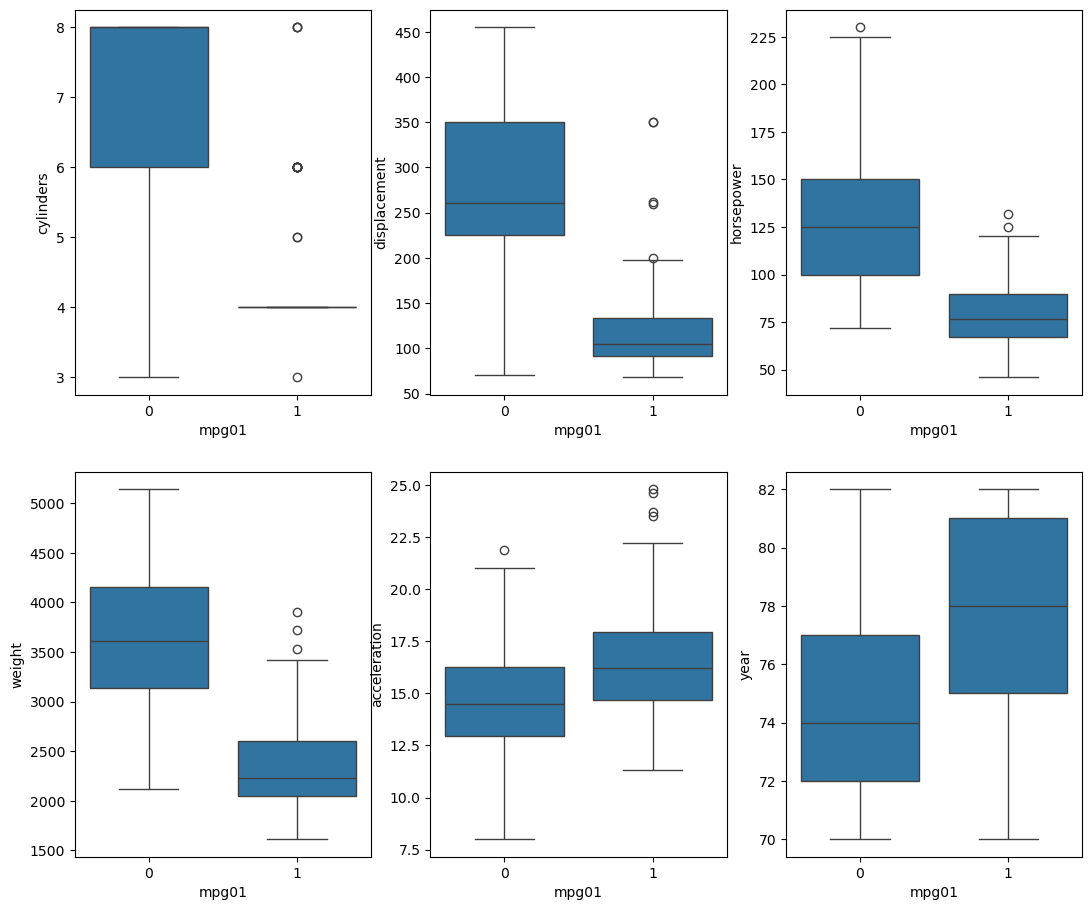

In [32]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 11))
sns.boxplot(x = 'mpg01', y = 'cylinders', data = auto, ax = axes[0, 0])
sns.boxplot(x = 'mpg01', y = 'displacement', data = auto, ax = axes[0, 1])
sns.boxplot(x = 'mpg01', y = 'horsepower', data = auto, ax = axes[0, 2])
sns.boxplot(x = 'mpg01', y = 'weight', data = auto, ax = axes[1, 0])
sns.boxplot(x = 'mpg01', y = 'acceleration', data = auto, ax = axes[1, 1])
sns.boxplot(x = 'mpg01', y = 'year', data = auto, ax = axes[1, 2]);

In [33]:
def stat_sign (predictor):
    t_stat, p_value = stats.ttest_ind(auto[auto['mpg01']==1][predictor], auto[auto['mpg01']==0][predictor])
    alpha = 0.05
    if p_value < alpha:
            print(f'For "{predictor}" reject the null hypothesis; there is a significant difference between 2 groups with p={p_value}')
    else:
            print(f'For "{predictor}" fail to reject the null hypothesis; there is no significant difference between 2 groups with p={p_value}')

In [34]:
for el in ['cylinders','displacement', 'horsepower', 'weight','acceleration', 'year']:
    stat_sign (el)

For "cylinders" reject the null hypothesis; there is a significant difference between 2 groups with p=9.689539998755988e-75
For "displacement" reject the null hypothesis; there is a significant difference between 2 groups with p=5.024074278849335e-73
For "horsepower" reject the null hypothesis; there is a significant difference between 2 groups with p=8.393893990426866e-52
For "weight" reject the null hypothesis; there is a significant difference between 2 groups with p=2.641649512391397e-74
For "acceleration" reject the null hypothesis; there is a significant difference between 2 groups with p=1.6030190025177756e-12
For "year" reject the null hypothesis; there is a significant difference between 2 groups with p=4.599186789439848e-19


In [35]:
auto_corr=auto[['cylinders','displacement', 'horsepower', 'weight',
       'acceleration', 'year','mpg01']].corr()
auto_corr

,cylinders,displacement,horsepower,weight,acceleration,year,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.429904
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,1.000000


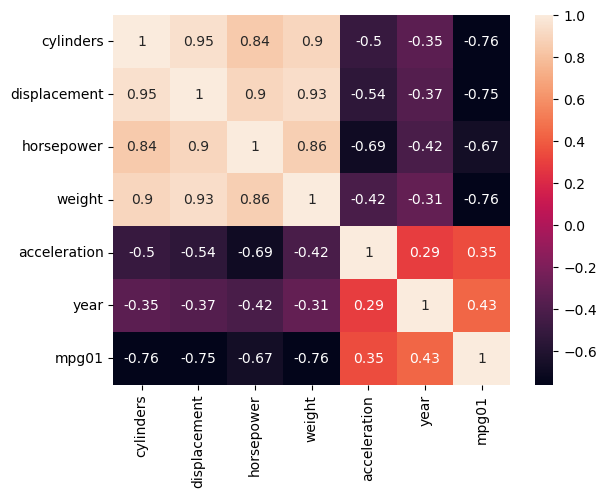

In [36]:
sns.heatmap(auto_corr, annot=True);

#### (c)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(auto, auto['mpg01'], test_size = 0.25, random_state = 312)

In [38]:
X_train=X_train.drop(columns=['mpg','acceleration','year','origin','name','mpg01'])
X_test=X_test.drop(columns=['mpg','acceleration','year','origin','name','mpg01'])

#### (d)

In [39]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,37,2
1,9,50


In [40]:
1-np.mean(lda_pred == y_test)

0.11224489795918369

**[ANSWER] LDA test error is 11.22%**

#### (e)

In [41]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,38,2
1,8,50


In [42]:
1-np.mean(qda_pred == y_test)

0.10204081632653061

**[ANSWER] QDA test error is 10.20%**

#### (f)

In [43]:
X1_train=sm.add_constant(X_train)
X1_test=sm.add_constant(X_test)

In [44]:
glm = sm.GLM(y_train,X1_train,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  mpg01   No. Observations:                  294
Model:                            GLM   Df Residuals:                      289
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71.729
Date:                Tue, 30 Apr 2024   Deviance:                       143.46
Time:                        20:14:41   Pearson chi2:                     731.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5926
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.9550      1.951      5.615      0.000       7.131      14.779
cylinders        0.4365      0.404      1.080      0.280      -0.356       1.229
displacement    -0.0252      0.010     -2.487      0.013      -0.045      -0.005
horsepower      -0.0361      0.016     -2.243      0.025      -0.068      -0.005
weight          -0.0019      0.001     -2.422      0.015      -0.003      -0.000
================================================================================
"""

In [45]:
probs = results.predict(X1_test)
labels=[]
for el in probs:
    if el>0.5:
        labels.append(1)
    else:
        labels.append(0)
probs
confusion_table(y_test, labels)

Truth,0,1
Predicted,,
0,37,9
1,3,49


In [46]:
1-np.mean(labels == y_test)

0.12244897959183676

**[ANSWER] Logistic regression test error is 12.24%**

Let's remove predictor `cylinders` as its p-value is high

In [47]:
X1_train=X1_train.drop(columns=['cylinders'])
X1_test=X1_test.drop(columns=['cylinders'])

In [48]:
glm = sm.GLM(y_train,X1_train,family=sm.families.Binomial())
results = glm.fit()
results.summary()
probs = results.predict(X1_test)
labels=[]
for el in probs:
    if el>0.5:
        labels.append(1)
    else:
        labels.append(0)
probs
confusion_table(y_test, labels)
1-np.mean(labels == y_test)

0.11224489795918369

**[ANSWER] Modified logistic regression test error is 11.22%**

#### (g)

In [49]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,0,1
Predicted,,
0,38,2
1,8,50


In [50]:
1-np.mean(nb_labels == y_test)

0.10204081632653061

**[ANSWER] Naive Bayes test error is 10.2%**

#### (h)

In [51]:
for K in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    
    print(f"K={K} preduction rate is {round((1-np.mean(knn_pred == y_test))*100,2)}%")

K=1 preduction rate is 12.24%
K=2 preduction rate is 16.33%
K=3 preduction rate is 12.24%
K=4 preduction rate is 12.24%
K=5 preduction rate is 11.22%
K=6 preduction rate is 10.2%
K=7 preduction rate is 12.24%
K=8 preduction rate is 12.24%
K=9 preduction rate is 13.27%
K=10 preduction rate is 12.24%


**[ANSWER] KNN (N=6) model test error is 10.2%**

___

### 15.

#### (a)

In [52]:
def Power(x):
    result=x**3
    print(f'{x} to the power 3 is {result}')
Power(2)

2 to the power 3 is 8


#### (b)

In [53]:
def Power2(x,a):
    result=x**a
    print(f'{x} to the power {a} is {result}')
Power2(3,8)

3 to the power 8 is 6561


#### (c)

In [54]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

10 to the power 3 is 1000
8 to the power 17 is 2251799813685248
131 to the power 3 is 2248091


#### (d)

In [55]:
def Power3(x,a):
    result=x**a
    return result
Power3(3,8)

6561

#### (e)

In [56]:
x=[x for x in range(1,11)]
y=[]
for i in x:
    y.append(Power3(i,2))

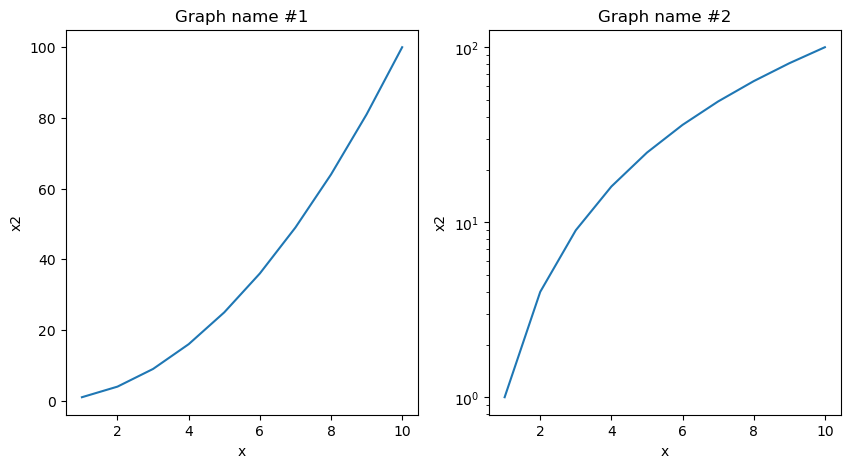

In [57]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(ax=axes[0],x=x, y=y)
axes[0].set_title('Graph name #1')
axes[0].set_xlabel('x')
axes[0].set_ylabel('x2');
sns.lineplot(ax=axes[1],x=x, y=y)
axes[1].set_title('Graph name #2')
axes[1].set_yscale("log")
axes[1].set_xlabel('x')
axes[1].set_ylabel('x2');


#### (f)

In [58]:
def PlotPower(x,a):
    y=[]
    for i in x:
        y.append(i**a)
    ax=sns.lineplot(x=x, y=y)
    ax.set_title('Graph name #1')
    ax.set_xlabel('x')
    ax.set_ylabel(f'x{a}');

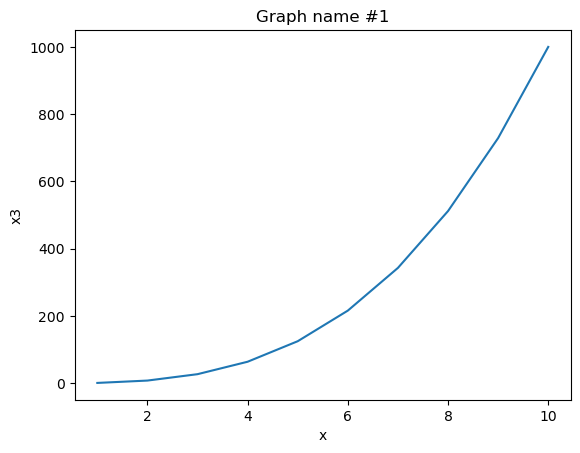

In [59]:
PlotPower(np.arange(1, 11), 3)

___

### 16.

In [60]:
Boston = load_data("Boston")
Boston.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [61]:
crim01=[]
for i, row in Boston.iterrows():
    if Boston.loc[i,'crim']>Boston['crim'].median():
        crim01.append(1)
    else:
        crim01.append(0)

In [62]:
Boston ['crim01'] = crim01

In [63]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.500000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.500495
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.500000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


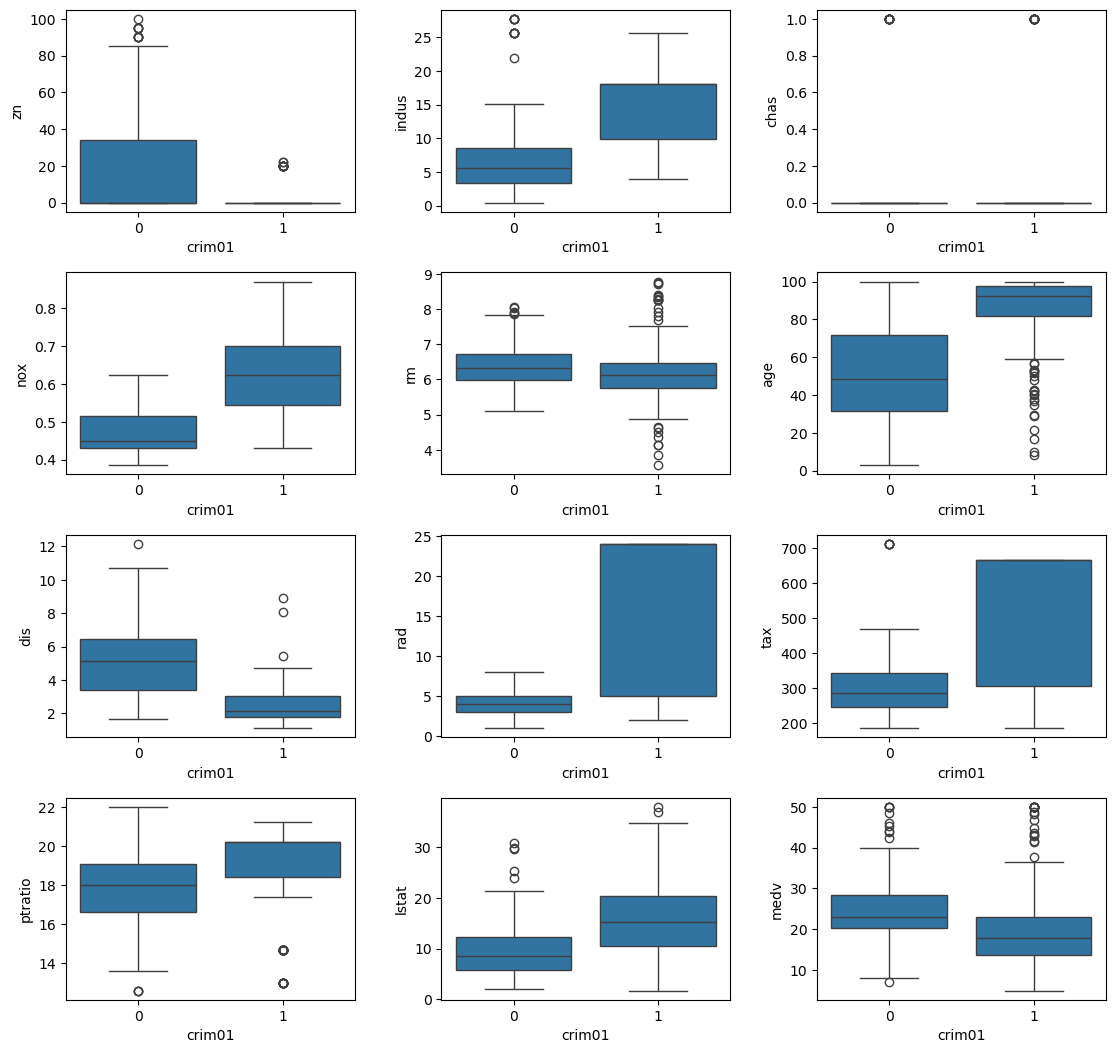

In [64]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (13, 11))
sns.boxplot(x = 'crim01', y = 'zn', data = Boston, ax = axes[0, 0])
sns.boxplot(x = 'crim01', y = 'indus', data = Boston, ax = axes[0, 1])
sns.boxplot(x = 'crim01', y = 'chas', data = Boston, ax = axes[0, 2])
sns.boxplot(x = 'crim01', y = 'nox', data = Boston, ax = axes[1, 0])
sns.boxplot(x = 'crim01', y = 'rm', data = Boston, ax = axes[1, 1])
sns.boxplot(x = 'crim01', y = 'age', data = Boston, ax = axes[1, 2])
sns.boxplot(x = 'crim01', y = 'dis', data = Boston, ax = axes[2, 0])
sns.boxplot(x = 'crim01', y = 'rad', data = Boston, ax = axes[2, 1])
sns.boxplot(x = 'crim01', y = 'tax', data = Boston, ax = axes[2, 2])
sns.boxplot(x = 'crim01', y = 'ptratio', data = Boston, ax = axes[3, 0])
sns.boxplot(x = 'crim01', y = 'lstat', data = Boston, ax = axes[3, 1])
sns.boxplot(x = 'crim01', y = 'medv', data = Boston, ax = axes[3, 2])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.3, 
                    hspace=0.3);

In [65]:
def stat_sign (predictor):
    t_stat, p_value = stats.ttest_ind(Boston[Boston['crim01']==1][predictor], Boston[Boston['crim01']==0][predictor])
    alpha = 0.05
    if p_value < alpha:
            print(f'For "{predictor}" reject the null hypothesis; there is a significant difference between 2 groups with p={p_value}')
    else:
            print(f'For "{predictor}" fail to reject the null hypothesis; there is no significant difference between 2 groups with p={p_value}')

In [66]:
for el in ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'lstat', 'medv']:
    stat_sign (el)

For "zn" reject the null hypothesis; there is a significant difference between 2 groups with p=6.527472007878083e-25
For "indus" reject the null hypothesis; there is a significant difference between 2 groups with p=1.7905568995278704e-51
For "chas" fail to reject the null hypothesis; there is no significant difference between 2 groups with p=0.11529663951684871
For "nox" reject the null hypothesis; there is a significant difference between 2 groups with p=4.585102216592171e-83
For "rm" reject the null hypothesis; there is a significant difference between 2 groups with p=0.0004147144913499322
For "age" reject the null hypothesis; there is a significant difference between 2 groups with p=9.67443117030443e-54
For "dis" reject the null hypothesis; there is a significant difference between 2 groups with p=2.9087736261600995e-54
For "rad" reject the null hypothesis; there is a significant difference between 2 groups with p=5.096299963982155e-55
For "tax" reject the null hypothesis; there is 

In [67]:
Boston_corr=Boston[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'lstat', 'medv','crim01']].corr()
Boston_corr

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
zn,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741
ptratio,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,0.374044,-0.507787,0.253568


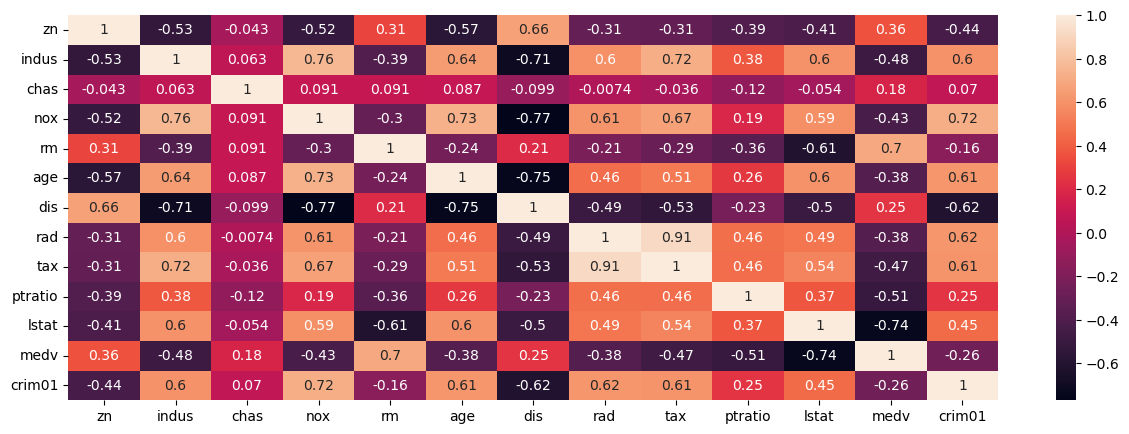

In [68]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(Boston_corr, annot=True);

Next predictors will be included into the model `indus`, `nox`, `age`, `dis`, `rad`, `tax`

In [69]:
X_train, X_test, y_train, y_test = train_test_split(Boston, Boston['crim01'], test_size = 0.25, random_state = 100)
X_train=X_train.drop(columns=['zn', 'chas', 'rm','ptratio', 'lstat', 'medv','crim01','crim' ])
X_test=X_test.drop(columns=['zn', 'chas', 'rm','ptratio', 'lstat', 'medv','crim01','crim'])

In [70]:
models_results=pd.DataFrame()
models_results['Model']=None
models_results['Test_error']=None

### Logistic regression

In [71]:
X1_train=sm.add_constant(X_train)
X1_test=sm.add_constant(X_test)
glm = sm.GLM(y_train,X1_train,family=sm.families.Binomial())
results = glm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 crim01   No. Observations:                  379
Model:                            GLM   Df Residuals:                      372
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -98.042
Date:                Tue, 30 Apr 2024   Deviance:                       196.08
Time:                        20:14:44   Pearson chi2:                     232.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5801
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.4083      3.851     -5.819      0.000     -29.955     -14.861
indus         -0.0282      0.046     -0.612      0.541      -0.119       0.062
nox           36.1391      6.879      5.253      0.000      22.656      49.622
age            0.0210      0.010      2.003      0.045       0.000       0.042
dis            0.3049      0.167      1.824      0.068      -0.023       0.633
rad            0.5400      0.128      4.205      0.000       0.288       0.792
tax           -0.0069      0.003     -2.669      0.008      -0.012      -0.002
==============================================================================
"""

In [72]:
probs = results.predict(exog=X1_test)
labels=[]
for el in probs:
    if el>0.5:
        labels.append(1)
    else:
        labels.append(0)
probs
confusion_table(y_test, labels)

Truth,0,1
Predicted,,
0,54,3
1,7,63


In [73]:
1-np.mean(labels == y_test)

0.07874015748031493

In [74]:
models_results.loc[len(models_results)] = ['Logistic regression (6 preds)', 1-np.mean(labels == y_test)]

Removing `indus` and `dis` from the model as those have high p-value

In [75]:
X2_train=X1_train.drop(columns=['indus','dis'])
X2_test=X1_test.drop(columns=['indus','dis'])

In [76]:
glm = sm.GLM(y_train,X2_train,family=sm.families.Binomial())
results = glm.fit()
probs = results.predict(exog=X2_test)
labels=[]
for el in probs:
    if el>0.5:
        labels.append(1)
    else:
        labels.append(0)
probs
1-np.mean(labels == y_test)

0.09448818897637801

In [77]:
models_results.loc[len(models_results)] = ['Logistic regression (4 preds)', 1-np.mean(labels == y_test)]

### LDA

In [78]:
lda = LDA(store_covariance=True)
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,55,16
1,2,54


In [79]:
1-np.mean(lda_pred == y_test)

0.1417322834645669

In [80]:
models_results.loc[len(models_results)] = ['LDA (6 preds)', 1-np.mean(lda_pred == y_test)]

In [81]:
X0_train=X_train.drop(columns=['indus','dis'])
X0_test=X_test.drop(columns=['indus','dis'])

In [82]:
lda = LDA(store_covariance=True)
lda.fit(X0_train, y_train)
lda_pred = lda.predict(X0_test)
models_results.loc[len(models_results)] = ['LDA (4 preds)', 1-np.mean(lda_pred == y_test)]

### QDA

In [83]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,54,11
1,3,59


In [84]:
1-np.mean(qda_pred == y_test)

0.11023622047244097

In [85]:
models_results.loc[len(models_results)] = ['QDA (6 preds)', 1-np.mean(qda_pred == y_test)]

In [86]:
qda = QDA(store_covariance=True)
qda.fit(X0_train, y_train)
qda_pred = qda.predict(X0_test)
models_results.loc[len(models_results)] = ['QDA (4 preds)', 1-np.mean(qda_pred == y_test)]

### Naive Bayes

In [87]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,0,1
Predicted,,
0,50,15
1,7,55


In [88]:
1-np.mean(nb_labels == y_test)

0.17322834645669294

In [89]:
models_results.loc[len(models_results)] = ['Naive Bayes (6 preds)', 1-np.mean(nb_labels == y_test)]

In [90]:
NB = GaussianNB()
NB.fit(X0_train, y_train)
nb_labels = NB.predict(X0_test)
models_results.loc[len(models_results)] = ['Naive Bayes (4 preds)', 1-np.mean(nb_labels == y_test)]

### KNN

In [91]:
for K in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X_train, y_train).predict(X_test)
    C = confusion_table(knn_pred, y_test)
    models_results.loc[len(models_results)] = [f'KNN (n={K}) (6 preds)', 1-np.mean(knn_pred == y_test)]

In [92]:
for K in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn_pred = knn.fit(X0_train, y_train).predict(X0_test)
    C = confusion_table(knn_pred, y_test)
    models_results.loc[len(models_results)] = [f'KNN (n={K}) (4 preds)', 1-np.mean(knn_pred == y_test)]

In [93]:
models_results

,Model,Test_error
0,Logistic regression (6 preds),0.078740
1,Logistic regression (4 preds),0.094488
2,LDA (6 preds),0.141732
3,LDA (4 preds),0.133858
4,QDA (6 preds),0.110236
5,QDA (4 preds),0.228346
6,Naive Bayes (6 preds),0.173228
7,Naive Bayes (4 preds),0.133858
8,KNN (n=1) (6 preds),0.078740
9,KNN (n=2) (6 preds),0.078740


In [94]:
models_results[models_results['Test_error']==models_results['Test_error'].min()]

,Model,Test_error
10,KNN (n=3) (6 preds),0.070866
11,KNN (n=4) (6 preds),0.070866
12,KNN (n=5) (6 preds),0.070866
20,KNN (n=3) (4 preds),0.070866
22,KNN (n=5) (4 preds),0.070866


**[ANSWER] Above is the list of models with least test error**